## Importando dependências

In [2]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
!pip install nbformat


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
!pip install -U scikit_learn scipy missingpy

                                              0.0/44.1 MB ? eta -:--:--
                                              0.3/44.1 MB 7.9 MB/s eta 0:00:06
                                              0.6/44.1 MB 7.4 MB/s eta 0:00:06
                                              0.8/44.1 MB 7.4 MB/s eta 0:00:06
     -                                        1.1/44.1 MB 6.6 MB/s eta 0:00:07
     -                                        1.4/44.1 MB 6.5 MB/s eta 0:00:07
     -                                        1.8/44.1 MB 6.7 MB/s eta 0:00:07
     -                                        2.1/44.1 MB 6.7 MB/s eta 0:00:07
     --                                       2.4/44.1 MB 6.6 MB/s eta 0:00:07
     --                                       2.7/44.1 MB 6.5 MB/s eta 0:00:07
     --                                       3.1/44.1 MB 6.7 MB/s eta 0:00:07
     --                                       3.3/44.1 MB 6.5 MB/s eta 0:00:07
     ---                                      3.7/44.1 MB 6


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
!python -m pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Importando dados

In [7]:
df_main = pd.read_csv('data/IM_230626_semNP.csv')

C:\Users\Inteli\AppData\Local\Temp\ipykernel_12916\252949267.py:1: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv('data/IM_230626_semNP.csv')


## Escolha de K

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [9]:
df_main = df_main.dropna(subset=["Patrimonio_Liquido"])
inadimplentes = df_main["Carteira_Direitos_Aquisicao_Inadimplentes"]
patrimonio_liquido = df_main["Patrimonio_Liquido"]
taxa_inadimplencia = inadimplentes / patrimonio_liquido

df_main = df_main.assign(taxa_inadimplencia_series=taxa_inadimplencia)

In [10]:
df_inadimplencia = df_main[[
'Patrimonio_Liquido',
'Carteira_Direitos_Aquisicao_Inadimplentes']]

In [11]:
SEED = 1224
np.random.seed(SEED)
pca_pipeline = Pipeline([('scaler', StandardScaler()),('PCA', PCA(n_components=2, random_state=SEED))])

Em relação à alta dimensionalidade, o algoritmo usa a distância euclidiana para determinar a associação de agrupamento, porém, quando temos uma alta dimensionalidade, pares de pontos começarão a ter distâncias muito semelhantes e não conseguiremos obter agrupamentos significativos. Para reduzir a quantidade de dados podemos utilizar a técnica chamada Análise de Componentes Principais (PCA).

Usando os dois módulos de auxílio, a padronização dos dados com o StandardScaler e a redução de dimensionalidade com o PCA, quando necessário, os resultados obtidos com o K-Means serão melhores do que apenas aplicar ele diretamente nos dados.

In [12]:
genre_embbeding_pca = pca_pipeline.fit_transform(df_inadimplencia)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embbeding_pca)

In [13]:
projection

x         y
0     -0.256462 -0.060999
1     -0.255644 -0.060181
2     -0.243818 -0.048355
3     -0.241605 -0.046142
4     -0.239943 -0.044480
...         ...       ...
56501 -0.248374 -0.052911
56502 -0.257791 -0.062328
56503 -0.267438 -0.071975
56504 -0.277013 -0.081550
56505 -0.286736 -0.091273

[56506 rows x 2 columns]

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)

kmeans_pca.fit(projection)

df_inadimplencia['cluster_pca'] = kmeans_pca.predict(projection)

projection['cluster_pca'] = kmeans_pca.predict(projection)

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 34430.44121881605.
Iteration 1, inertia 27230.388245520735.
Iteration 2, inertia 20887.705677060803.
Iteration 3, inertia 19993.16053893458.
Iteration 4, inertia 19759.022185374684.
Iteration 5, inertia 19615.062274619348.
Iteration 6, inertia 19551.784246253716.
Iteration 7, inertia 19515.856933049155.
Iteration 8, inertia 19504.212231996346.
Iteration 9, inertia 19497.00145815245.
Iteration 10, inertia 19494.3597739887.
Iteration 11, inertia 19489.07089509151.
Iteration 12, inertia 19482.93628228826.
Iteration 13, inertia 19480.805634647997.
Iteration 14, inertia 19480.430318732444.
Converged at iteration 14: center shift 1.0386180717844998e-06 within tolerance 0.00010000000000000003.
Initialization complete
Iteration 0, inertia 23886.520705033516.
Iteration 1, inertia 20140.570074953008.
Iteration 2, inertia 19652.977493117298.
Iteration 3, inertia 19406.918215863425.
Iteration 4, inertia 19322.880376189074.
Iteration 5, inertia 19313.533

C:\Users\Inteli\AppData\Local\Temp\ipykernel_12916\2496283066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inadimplencia['cluster_pca'] = kmeans_pca.predict(projection)


In [16]:
projection['Carteira_Direitos_Aquisicao_Inadimplentes'] = df_main['Carteira_Direitos_Aquisicao_Inadimplentes']

In [17]:
projection

x         y  cluster_pca  \
0     -0.256462 -0.060999            0   
1     -0.255644 -0.060181            0   
2     -0.243818 -0.048355            0   
3     -0.241605 -0.046142            0   
4     -0.239943 -0.044480            0   
...         ...       ...          ...   
56501 -0.248374 -0.052911            0   
56502 -0.257791 -0.062328            0   
56503 -0.267438 -0.071975            0   
56504 -0.277013 -0.081550            0   
56505 -0.286736 -0.091273            0   

       Carteira_Direitos_Aquisicao_Inadimplentes  
0                                            0.0  
1                                            0.0  
2                                            0.0  
3                                            0.0  
4                                            0.0  
...                                          ...  
56501                                        0.0  
56502                                        0.0  
56503                                        0.0  
56504                                        0.0  
56505                                        0.0  

[56506 rows x 4 columns]

In [18]:
fig = px.scatter(projection, x='x', y='y', color='cluster_pca', hover_data=['x','y', 'Carteira_Direitos_Aquisicao_Inadimplentes'])
fig.show()

uma forma de avaliarmos se a cluster foi bem separada ou não, é utilizarmos um explained variance do PCA.

Então vou colocar pca_pipeline[1].explained_variance_ratio_, estou passando a posição 1, porque a primeira, que seria 0, é do nosso StandardScaler, a 1 é do nosso PCA.

In [19]:
pca_pipeline[1].explained_variance_ratio_.sum()

1.0

In [20]:
pca_pipeline[1].explained_variance_.sum()

2.0000353950977754

## Carteira financeiro

A métrica utilizada será a taxa de inadimplência, calculada pela carteira de direitos de aquisição inadimplentes dividido pelo patrimônio líquido

In [21]:
df_main = df_main.dropna(subset=["Patrimonio_Liquido"])
inadimplentes = df_main["Carteira_Direitos_Aquisicao_Inadimplentes"]
patrimonio_liquido = df_main["Patrimonio_Liquido"]
taxa_inadimplencia = inadimplentes / patrimonio_liquido


df_main = df_main.assign(taxa_inadimplencia_series=taxa_inadimplencia)


In [22]:
fundos = df_main[
    (df_main['taxa_inadimplencia_series'] != 0) &
    df_main['taxa_inadimplencia_series'].notna()
]

list(fundos['Nome_Fundo'].unique())

['FUNDO DE INVES TIMENTO EM DIREITOS CREDITORIOS - IBUY',
 'MAGALU I - FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS.',
 'REAG SPECIAL SITUATION FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS ABERTO',
 'MAX CAPITAL FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS',
 'FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS SILVERSTONES',
 'GESTOR TRUST FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS MULTISSETORIAL                           ',
 'BAVIERA FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS',
 'ASTAT FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS',
 'FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS CALCARD',
 'AUGME VD  FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS',
 'SC PIEMONTE FUNDO DE INVESTIMENTOS EM DIREITOS CREDITORIOS',
 'FUNDO DE INVESTIMENTO EM DIREITOS CREDITORIOS - WIRECARD',
 'AR BANK FUNDO DE INVESTIMENTO EM DIREITOS CREDITORIOS IMOBILIÁRIOS I',
 'FLYTOUR FINANCE FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS MULTISSETORIAL LP FECHADO',
 'OPENCO FUNDO DE INVESTIMENTO EM DIREITOS CREDIT

selecionou-se os fundos cuja taxa de inadimplência fosse válida, ou seja, apenas aqueles que a taxa de inadimplência fosse diferente de 0 e NaN

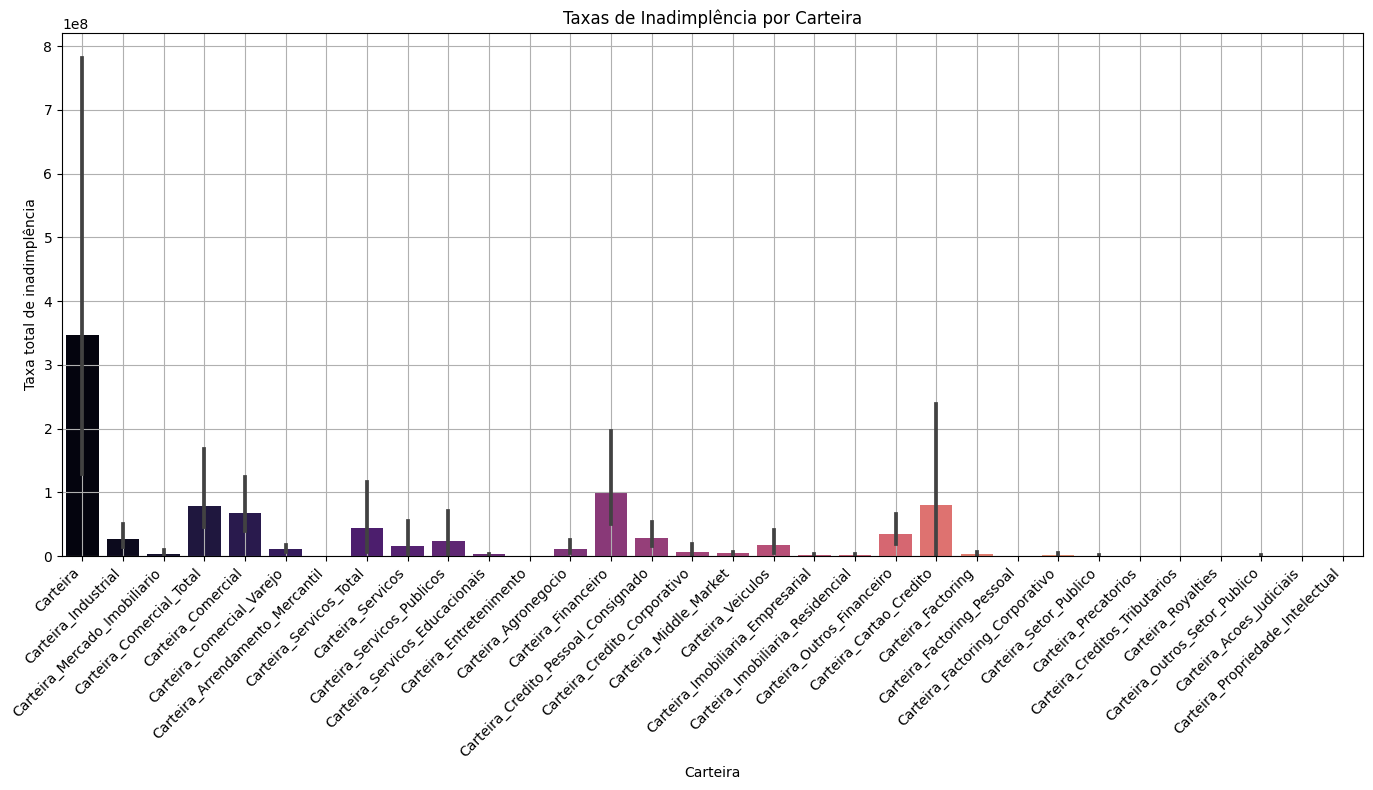

In [23]:
carteiras = [
    'Carteira',
    'Carteira_Industrial',
    'Carteira_Mercado_Imobiliario',
    'Carteira_Comercial_Total',
    'Carteira_Comercial',
    'Carteira_Comercial_Varejo',
    'Carteira_Arrendamento_Mercantil',
    'Carteira_Servicos_Total',
    'Carteira_Servicos',
    'Carteira_Servicos_Publicos',
    'Carteira_Servicos_Educacionais',
    'Carteira_Entretenimento',
    'Carteira_Agronegocio',
    'Carteira_Financeiro',
    'Carteira_Credito_Pessoal_Consignado',
    'Carteira_Credito_Corporativo',
    'Carteira_Middle_Market',
    'Carteira_Veiculos',
    'Carteira_Imobiliaria_Empresarial',
    'Carteira_Imobiliaria_Residencial',
    'Carteira_Outros_Financeiro',
    'Carteira_Cartao_Credito',
    'Carteira_Factoring',
    'Carteira_Factoring_Pessoal',
    'Carteira_Factoring_Corporativo',
    'Carteira_Setor_Publico',
    'Carteira_Precatorios',
    'Carteira_Creditos_Tributarios',
    'Carteira_Royalties',
    'Carteira_Outros_Setor_Publico',
    'Carteira_Acoes_Judiciais',
    'Carteira_Propriedade_Intelectual',
]

soma_carteiras = df_main.groupby('taxa_inadimplencia_series')[carteiras].sum()
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=soma_carteiras, palette='magma')
plt.title('Taxas de Inadimplência por Carteira')
plt.ylabel('Taxa total de inadimplência')
plt.xlabel('Carteira')
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()

plt.show()

O gráfico foi plotado com todos os tipos de carteira, avaliando a taxa de inadimplência de cada segmento.

In [24]:
soma_carteiras.head(5)

Carteira  Carteira_Industrial  \
taxa_inadimplencia_series                                     
-6.618574e+08              19855722.75                  0.0   
-6.328660e+01                254356.86                  0.0   
-5.208075e+01              37788413.75                  0.0   
-4.824552e+01              37788413.75                  0.0   
-4.242879e+01               5012600.00                  0.0   

                           Carteira_Mercado_Imobiliario  \
taxa_inadimplencia_series                                 
-6.618574e+08                                       0.0   
-6.328660e+01                                       0.0   
-5.208075e+01                                       0.0   
-4.824552e+01                                       0.0   
-4.242879e+01                                       0.0   

                           Carteira_Comercial_Total  Carteira_Comercial  \
taxa_inadimplencia_series                                                 
-6.618574e+08                                   0.0                 0.0   
-6.328660e+01                                   0.0                 0.0   
-5.208075e+01                                   0.0                 0.0   
-4.824552e+01                                   0.0                 0.0   
-4.242879e+01                                   0.0                 0.0   

                           Carteira_Comercial_Varejo  \
taxa_inadimplencia_series                              
-6.618574e+08                                    0.0   
-6.328660e+01                                    0.0   
-5.208075e+01                                    0.0   
-4.824552e+01                                    0.0   
-4.242879e+01                                    0.0   

                           Carteira_Arrendamento_Mercantil  \
taxa_inadimplencia_series                                    
-6.618574e+08                                          0.0   
-6.328660e+01                                          0.0   
-5.208075e+01                                          0.0   
-4.824552e+01                                          0.0   
-4.242879e+01                                          0.0   

                           Carteira_Servicos_Total  Carteira_Servicos  \
taxa_inadimplencia_series                                               
-6.618574e+08                                  0.0                0.0   
-6.328660e+01                                  0.0                0.0   
-5.208075e+01                                  0.0                0.0   
-4.824552e+01                                  0.0                0.0   
-4.242879e+01                                  0.0                0.0   

                           Carteira_Servicos_Publicos  ...  \
taxa_inadimplencia_series                              ...   
-6.618574e+08                                     0.0  ...   
-6.328660e+01                                     0.0  ...   
-5.208075e+01                                     0.0  ...   
-4.824552e+01                                     0.0  ...   
-4.242879e+01                                     0.0  ...   

                           Carteira_Factoring  Carteira_Factoring_Pessoal  \
taxa_inadimplencia_series                                                   
-6.618574e+08                             0.0                         0.0   
-6.328660e+01                             0.0                         0.0   
-5.208075e+01                             0.0                         0.0   
-4.824552e+01                             0.0                         0.0   
-4.242879e+01                             0.0                         0.0   

                           Carteira_Factoring_Corporativo  \
taxa_inadimplencia_series                                   
-6.618574e+08                                         0.0   
-6.328660e+01                                         0.0   
-5.208075e+01                                         0.0   
-4.824552e+01               

## K-means

O K-means é um algoritmo de agrupamento de dados que divide um conjunto de pontos em grupos (clusters) com base em suas características similares, buscando minimizar a variância dentro de cada grupo.

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



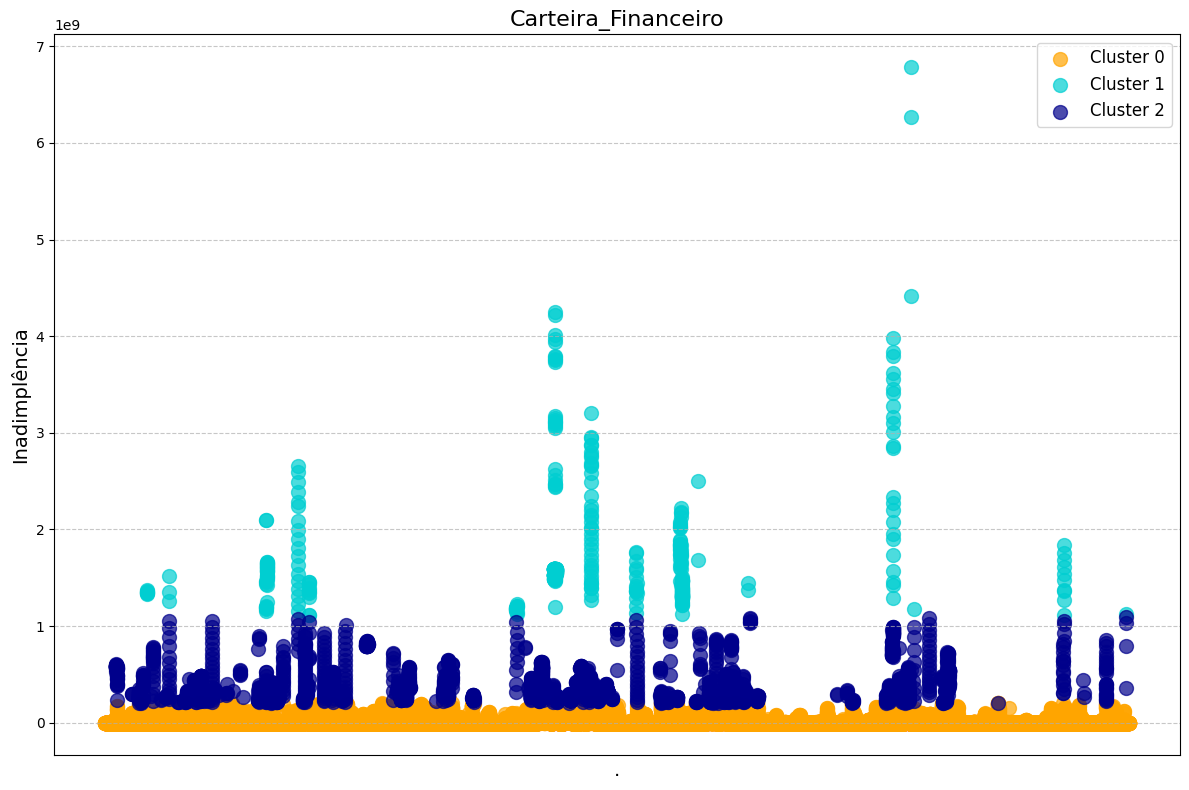

In [25]:
from sklearn.cluster import KMeans

carteira_financeiro = 'Carteira_Financeiro'

fundos = df_main[df_main[carteira_financeiro].notna()]

X = fundos[[carteira_financeiro]]

kmeans = KMeans(n_clusters=3)
fundos['grupo'] = kmeans.fit_predict(X)

cores = ['#FFA500', '#00CED1', '#00008B']
fig, ax = plt.subplots(figsize=(12, 8))

for grupo in range(3):
    grupo_df = fundos[fundos['grupo'] == grupo]
    ax.scatter(grupo_df.index, grupo_df[carteira_financeiro],
               color=cores[grupo], label=f'Cluster {grupo}', s=100, alpha=0.7)

ax.set_title(f'{carteira_financeiro}', fontsize=16)
ax.set_xlabel('.', fontsize=14)
ax.set_ylabel('Inadimplência', fontsize=14)
ax.set_xticks([])
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

ax.set_facecolor('white')

plt.tight_layout()
plt.show()

In [26]:
cluster1 = fundos[fundos['grupo'] == 1].unique()

cluster1 = cluster1.sort_values(by='taxa_inadimplencia_series', ascending=False)

fundos_inadimplencia = cluster1.head(30)

for index, row in fundos_inadimplencia.iterrows():
    print(f'Nome do Fundo: {row["Nome_Fundo"]}')
    print(f'CNPJ do Fundo: {row["CNPJ"]}')
    print(f'Taxa de Inadimplência: {row["taxa_inadimplencia_series"]}')
    print(f'Data de competência: {row["Data_Competencia"]}')
    print('-' * 30)


Nome do Fundo: FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS F ACB - FINANCEIRO
CNPJ do Fundo: 14330038000137
Taxa de Inadimplência: 1.8991817790613084
Data de competência: 2016-11-30
------------------------------
Nome do Fundo: FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS F ACB - FINANCEIRO
CNPJ do Fundo: 14330038000137
Taxa de Inadimplência: 1.8741961529977773
Data de competência: 2016-10-31
------------------------------
Nome do Fundo: FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS F ACB - FINANCEIRO
CNPJ do Fundo: 14330038000137
Taxa de Inadimplência: 1.8528259748280258
Data de competência: 2013-03-31
------------------------------
Nome do Fundo: FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS F ACB - FINANCEIRO
CNPJ do Fundo: 14330038000137
Taxa de Inadimplência: 1.8471042991122482
Data de competência: 2016-09-30
------------------------------
Nome do Fundo: FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS F ACB - FINANCEIRO
CNPJ do Fundo: 14330038000137
Taxa de Inadimplência: 1.81968

Mostra as maiores taxas de inadimplência do cluster 1, ou seja do cluster que agrupa as maiores taxas de inadimplência dos dados.

#### Silhouette Score
O Silhouette Score avalia a coesão interna dos clusters e a separação entre os clusters. Ele varia de -1 a 1, com valores mais próximos de 1 indicando um bom agrupamento. Um valor negativo sugere que os pontos podem ter sido atribuídos ao cluster errado.

In [27]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, fundos['grupo'])
f'Coeficiente de Silhueta: {silhouette_avg}'

'Coeficiente de Silhueta: 0.9151350849612944'

#### Utilização do K-Means como Primeiro Modelo Candidato para o Problema

Na busca por uma solução eficiente para o problema em questão, a escolha inicial recaiu sobre o algoritmo K-Means. O K-Means é um método de clustering (agrupamento) amplamente utilizado na análise de dados e aprendizado de máquina. Sua aplicação visa agrupar dados em clusters, onde cada cluster contém pontos de dados que são mais semelhantes entre si do que com pontos de dados de outros clusters.

#### Justificativa para a Definição do K do Modelo

A determinação do número de clusters (K) é crucial para o sucesso do K-Means. Nesse contexto, foi empregada a métrica do coeficiente de silhueta (silhouette score) para encontrar o valor mais adequado de K. O coeficiente de silhueta mede a similaridade média entre um objeto e seu cluster em relação aos outros clusters, variando de -1 (representando uma alocação de cluster inadequada) a 1 (indicação de uma alocação ideal).

No teste realizado, o coeficiente de silhueta obteve um valor considerável de 0.9151350849612944. Esse resultado sugere que os clusters encontrados pelo K-Means são bem definidos e que a alocação de cada ponto de dados ao seu cluster é apropriada. Portanto, o valor de K utilizado nesse modelo é substancialmente apropriado para a tarefa, proporcionando uma segmentação eficaz dos dados.

## DBSCAN

In [28]:
from sklearn.cluster import DBSCAN

scaler = StandardScaler()


dbscan = DBSCAN(eps=.1, min_samples=10)

carteira_financeiro = 'Carteira_Financeiro'

X = fundos[[carteira_financeiro]]
X = scaler.fit_transform(X)


fundos['grupo'] = dbscan.fit_predict(X)

fig, ax = plt.subplots(figsize=(12, 8))

for grupo in range(len(fundos['grupo'].unique())):
    grupo_df = fundos[fundos['grupo'] == grupo]
    ax.scatter(grupo_df.index, grupo_df[carteira_financeiro],
                label=f'Cluster {grupo}', s=100, alpha=0.7)

ax.set_title(f'{carteira_financeiro}', fontsize=16)
ax.set_xlabel('.', fontsize=14)
ax.set_ylabel('Inadimplência', fontsize=14)
ax.set_xticks([])
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

ax.set_facecolor('white')

plt.show()

MemoryError: bad allocation

In [ ]:
fundos['grupo'].value_counts()

In [ ]:
silhouette_avg = silhouette_score(X, fundos['grupo'])
f'Coeficiente de Silhueta: {silhouette_avg}'

## Conclusão

Ao testar o algoritmo não supervisionado DBSCAN, não foi possível efetuar uma separação clara entre os fundos. O modelo testado funciona separando clusters por densidade de dados, tendo como hiperparâmetros o epsilon, que basicamente mede o raio do cluster, e o min_samples, que determina o número mínimo de pontos para formar uma região densa. Entendendo o funcionamento do DBSCAN, é possível compreender o porquê da seperação confusa do modelo, tendo em vista que não regiões determinadas de grande densidade, reforçando a natureza caótica do dataset.